In [9]:
%pylab inline
from pygadgetreader import *
font = {'size':13, 'family':'serif'}
matplotlib.rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


# Computing the CM 

## Basic approach:

In [3]:
# Random points in a sphere:

r = random.random(1000) 
theta = random.random(1000) * 2 - 1
phi = random.random(1000) * 2 * np.pi

x1 = r**(1/3.0) * sin(arccos(theta)) * sin(phi)
y1 = r**(1/3.0) * sin(arccos(theta)) * cos(phi)
z1 = r**(1/3.0) * theta

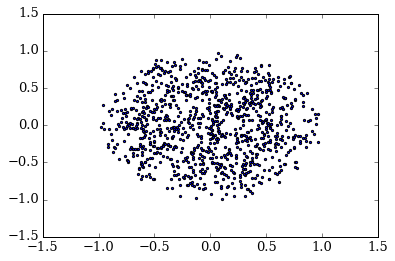

In [3]:
scatter(x1, z1, s=5)

In [4]:
# CM coordinates:
xCM = sum(x1)/len(x1)
yCM = sum(y1)/len(y1)
zCM = sum(z1)/len(z1)

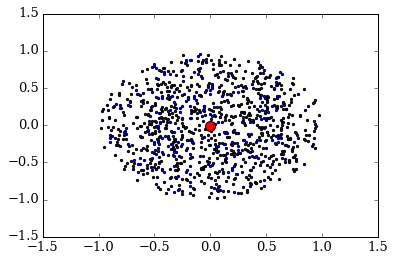

In [5]:
scatter(x1, z1, s=5)
scatter(xCM, zCM, s=100, c='r')

## Iterative approach:


In [6]:
def CM(x, y, z, vx, vy, vz, delta):
    
    N = len(x)
    xCM = sum(x)/len(x)
    yCM = sum(y)/len(y)
    zCM = sum(z)/len(z)

    xCM_new = [xCM]
    yCM_new = [yCM]
    zCM_new = [zCM]
    
    xCM = 0.0
    yCM = 0.0
    zCM = 0.0

    
    vxCM_new = [sum(vx)/N]
    vyCM_new = [sum(vy)/N]
    vzCM_new = [sum(vz)/N]
    R1 = np.sqrt((x - xCM_new)**2 + (y - yCM_new)**2 + (z - zCM_new)**2)
    Rnow = [max(R1)]

    while (np.sqrt((xCM_new[-1]-xCM)**2 + (yCM_new[-1]-yCM)**2 +(zCM_new[-1]-zCM)**2) > delta):
        xCM = xCM_new[-1]
        yCM = yCM_new[-1]
        zCM = zCM_new[-1]
        Rcm = np.sqrt(xCM**2 + yCM**2 + zCM**2)
        R = np.sqrt((x - xCM)**2 + (y - yCM)**2 + (z - zCM)**2)
        Rmax = max(R)
        index = where(R<Rmax/2.0)
        x = x[index]
        y = y[index]
        z = z[index]
        vx = vx[index]
        vy = vy[index]
        vz = vz[index]
        N = len(x)
        xCM_new.append(sum(x)/N)
        yCM_new.append(sum(y)/N)
        zCM_new.append(sum(z)/N)
        vxCM_new.append(sum(vx)/N)
        vyCM_new.append(sum(vy)/N)
        vzCM_new.append(sum(vz)/N)
        Rnow.append(max(np.sqrt((x - xCM_new[-1])**2 + (y - yCM_new[-1])**2 + (z - zCM_new[-1])**2)))

        #scatter(xCM_new, yCM_new)

    print N
    return xCM_new, yCM_new, zCM_new, vxCM_new, vyCM_new, vzCM_new, Rnow

In [95]:
CM(x1, y1, z1, 0, 0, 0, 0.5)


1000


([-0.0055994813038382297],
 [-0.042259406068041232],
 [0.0091327784686695782],
 [0],
 [0],
 [0],
 [])

# Testing the code in a simulation snapshot:

In [9]:
positions = readsnap("../../data/LMCMW/MW1LMC4/snapshots/MW1LMC4_000", 'pos', 'dm')
velocities = readsnap("../../data/LMCMW/MW1LMC4/snapshots/MW1LMC4_000", 'vel', 'dm')
particles_ids = readsnap("../../data/LMCMW/MW1LMC4/snapshots/MW1LMC4_000", 'pid', 'dm')
disk = readsnap("../../data/LMCMW/MW1LMC4/snapshots/MW1LMC4_000", 'pos', 'disk')
vdisk = readsnap("../../data/LMCMW/MW1LMC4/snapshots/MW1LMC4_000", 'vel', 'disk')
bulge = readsnap("../../data/LMCMW/MW1LMC4/snapshots/MW1LMC4_000", 'pos', 'bulge')
vbulge = readsnap("../../data/LMCMW/MW1LMC4/snapshots/MW1LMC4_000", 'vel', 'bulge')

#potential = readsnap("../../data/LMCMW/MW1LMC4/snapshots/MW1LMC4_000", 'pot', 'dm')



Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DISK  Positions
Returning DISK  Velocities
Returning BULGE Positions
Returning BULGE Velocities


### Finging MW DM particles & LMC DM particles

In [10]:
X = sort(particles_ids)
limit = X[29999]
index_mw = where(particles_ids<=49376)
index_LMC = where(particles_ids>49376)

In [11]:
print X
print limit
print len(X)
print int(len(X)/2.0 - 1.0)

[    1     2     3 ..., 79998 79999 80000]
49376
60000
29999


In [12]:
x_sim_mw = positions[index_mw[0],0]
y_sim_mw = positions[index_mw[0],1]
z_sim_mw = positions[index_mw[0],2]

x_sim_lmc = positions[index_LMC[0],0]
y_sim_lmc = positions[index_LMC[0],1]
z_sim_lmc = positions[index_LMC[0],2]

vx_sim_mw = velocities[index_mw[0],0]
vy_sim_mw = velocities[index_mw[0],1]
vz_sim_mw = velocities[index_mw[0],2]

vx_sim_lmc = velocities[index_LMC[0],0]
vy_sim_lmc = velocities[index_LMC[0],1]
vz_sim_lmc = velocities[index_LMC[0],2]

x_disk = disk[:,0]
y_disk = disk[:,1]
z_disk = disk[:,2]

vx_disk = vdisk[:,0]
vy_disk = vdisk[:,1]
vz_disk = vdisk[:,2]

x_bulge = bulge[:,0]
y_bulge = bulge[:,1]
z_bulge = bulge[:,2]

vx_bulge = vbulge[:,0]
vy_bulge = vbulge[:,1]
vz_bulge = vbulge[:,2]


print len(x_sim_mw), len(x_sim_lmc), len(x_disk), len(x_bulge)

30000 30000 10000 10000


(-20, 20)

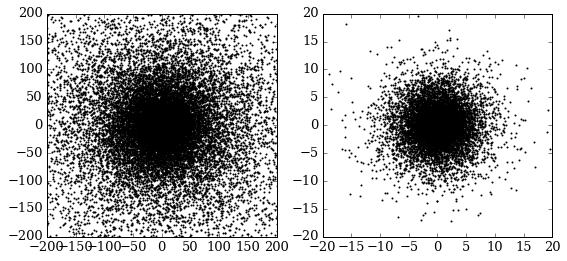

In [13]:
figure(figsize=(14, 4))
subplot(1, 3, 1)
scatter(x_sim_mw, z_sim_mw, s=1.0)
xlim(-200, 200)
ylim(-200, 200)

subplot(1, 3, 2)
scatter(x_disk, y_disk, s=1.0)
xlim(-20, 20)
ylim(-20, 20)

(-200, 200)

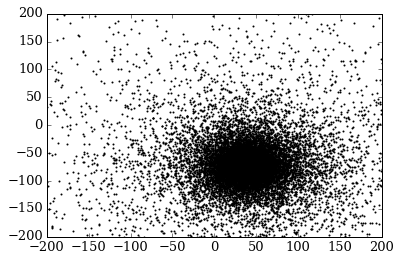

In [14]:
scatter(x_sim_lmc, z_sim_lmc, s=1.0)
xlim(-200, 200)
ylim(-200, 200)

In [117]:
X_sim_mwCM, Y_sim_mwCM, Z_sim_mwCM, vX_sim_mwCM, vY_sim_mwCM, vZ_sim_mwCM = CM(x_sim_mw, y_sim_mw, z_sim_mw, vx_sim_mw, vy_sim_mw, vz_sim_mw, 0.4)
X_sim_lmcCM, Y_sim_lmcCM, Z_sim_lmcCM, vX_sim_lmcCM, vY_sim_lmcCM, vZ_sim_lmcCM  = CM(x_sim_lmc, y_sim_lmc, z_sim_lmc, vx_sim_lmc, vy_sim_lmc, vz_sim_lmc, 0.1)

print X_sim_mwCM[-1], Y_sim_mwCM[-1], Z_sim_mwCM[-1]

7207
7179
-0.134805437164 -0.228039945431 -0.469590179795


In [119]:
X_sim_disk, Y_sim_disk, Z_sim_disk, vX_sim_disk, vY_sim_disk, vZ_sim_disk = CM(x_disk, y_disk, z_disk, vx_disk, vy_disk, vz_disk, 0.01)
X_sim_bulge, Y_sim_bulge, Z_sim_bulge, vX_sim_bulge, vY_sim_bulge, vZ_sim_bulge = CM(x_bulge, y_bulge, z_bulge, vx_bulge, vy_bulge, vz_bulge, 0.01)

print len(X_sim_disk)
print len(X_sim_bulge)
print X_sim_disk[-1], Y_sim_disk[-1], Z_sim_disk[-1]
print X_sim_bulge[-1], Y_sim_bulge[-1], Z_sim_bulge[-1]

9917
9119
2
11
-0.0197111796958 0.0490153971321 0.00252089308577
0.0131956816426 0.0182834612276 0.0418945071545


In [120]:
print vX_sim_mwCM[-1], vY_sim_mwCM[-1], vZ_sim_mwCM[-1]
print vX_sim_disk[-1], vY_sim_disk[-1], vZ_sim_disk[-1]
print vX_sim_bulge[-1], vY_sim_bulge[-1], vZ_sim_bulge[-1]

1.35088539679 -0.140483078653 -3.06713958651
-2.22825624559 -0.472409032076 0.0510102072298
0.806298897734 -0.373559706853 0.225122153308


In [121]:
Rcmmw = np.zeros(len(X_sim_mwCM))
Rlmc = np.zeros(len(X_sim_lmcCM))
Rdisk = np.zeros(len(X_sim_disk))
Rbulge = np.zeros(len(X_sim_bulge))

Vcmmw = np.zeros(len(X_sim_mwCM))
Vlmc = np.zeros(len(X_sim_lmcCM))
Vdisk = np.zeros(len(X_sim_disk))
Vbulge = np.zeros(len(X_sim_bulge))

iterationmw = np.zeros(len(X_sim_mwCM))
iterationlmc = np.zeros(len(X_sim_lmcCM))
iterationdisk = np.zeros(len(X_sim_disk))
iterationbulge = np.zeros(len(X_sim_bulge))


for i in range(len(X_sim_mwCM)):
    Rcmmw[i] = np.sqrt(X_sim_mwCM[i]**2 + Y_sim_mwCM[i]**2 + Z_sim_mwCM[i]**2)
    Vcmmw[i] = np.sqrt(vX_sim_mwCM[i]**2 + vY_sim_mwCM[i]**2 + vZ_sim_mwCM[i]**2)
    iterationmw[i] = float(i)

for i in range(len(X_sim_lmcCM)):
    Rlmc[i] = np.sqrt(X_sim_lmcCM[i]**2 + Y_sim_lmcCM[i]**2 + Z_sim_lmcCM[i]**2)
    Vlmc[i] = np.sqrt(vX_sim_lmcCM[i]**2 + vY_sim_lmcCM[i]**2 + vZ_sim_lmcCM[i]**2)
    iterationlmc[i] = float(i)

for i in range(len(X_sim_disk)):
    Rdisk[i] = np.sqrt(X_sim_disk[i]**2 + Y_sim_disk[i]**2 + Z_sim_disk[i]**2)
    Vdisk[i] = np.sqrt(vX_sim_disk[i]**2 + vY_sim_disk[i]**2 + vZ_sim_disk[i]**2)
    iterationdisk[i] = float(i)
    
for i in range(len(X_sim_bulge)):
    Rbulge[i] = np.sqrt(X_sim_bulge[i]**2 + Y_sim_bulge[i]**2 + Z_sim_bulge[i]**2)
    Vbulge[i] = np.sqrt(vX_sim_bulge[i]**2 + vY_sim_bulge[i]**2 + vZ_sim_bulge[i]**2)
    iterationbulge[i] = float(i)

In [122]:
def difference(R):
    Rdif = np.zeros(len(R)-1)
    for i in range(len(R)-1):
        Rdif[i] = abs(R[i+1] - R[i])
    return Rdif

In [123]:
RdifMW = difference(Rcmmw)
Rdiflmc = difference(Rlmc)

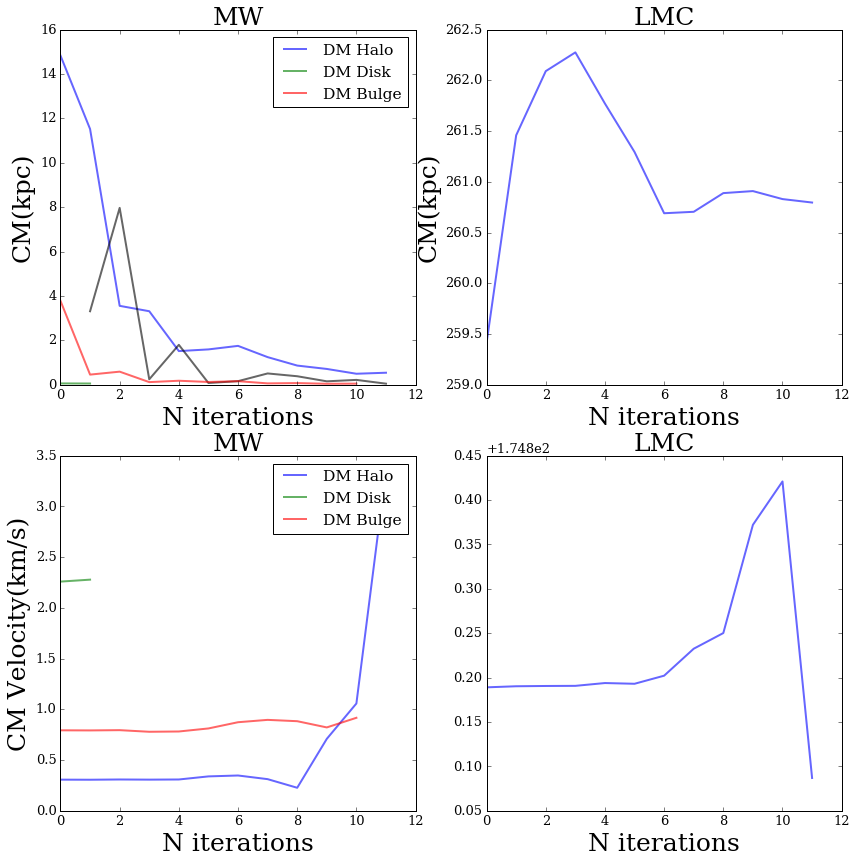

In [124]:
figure(figsize=(14, 14))

subplot(2, 2, 1)
plot(iterationmw, Rcmmw, lw=2, alpha=0.6, label='DM Halo')
plot(iterationmw[1:], RdifMW, lw=2, c='k', alpha=0.6)
plot(iterationdisk, Rdisk, lw=2, alpha=0.6, label='DM Disk')
plot(iterationbulge, Rbulge, lw=2, alpha=0.6, label='DM Bulge')
xlabel('N iterations', fontsize=25)
ylabel('CM(kpc)', fontsize=25)
title('MW', fontsize=25)
legend()

subplot(2, 2, 2)
plot(iterationlmc, Rlmc, lw=2, alpha=0.6)
#plot(iterationlmc[1:], Rdiflmc, lw=2, c='k', alpha=0.6)
xlabel('N iterations', fontsize=25)
ylabel('CM(kpc)', fontsize=25)
title('LMC', fontsize=25)

subplot(2, 2, 3)
plot(iterationmw, Vcmmw, lw=2, alpha=0.6, label='DM Halo')
#plot(iterationmw[1:], VdifMW, lw=2, c='k', alpha=0.6)
plot(iterationdisk, Vdisk, lw=2, alpha=0.6, label='DM Disk')
plot(iterationbulge, Vbulge, lw=2, alpha=0.6, label='DM Bulge')
xlabel('N iterations', fontsize=25)
ylabel('CM Velocity(km/s)', fontsize=25)
title('MW', fontsize=25)
legend()

subplot(2, 2, 4)
plot(iterationlmc, Vlmc, lw=2, alpha=0.6)
#plot(iterationlmc[1:], Vlmc, lw=2, c='k', alpha=0.6)
xlabel('N iterations', fontsize=25)
title('LMC', fontsize=25)


savefig('CM_computation_convergence.png', bbox_inches='tight')


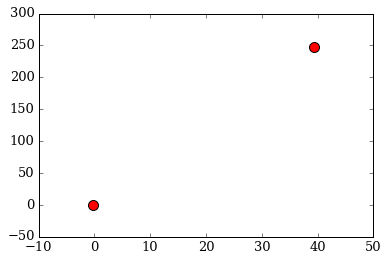

In [22]:
scatter(X_sim_mwCM[-1], Y_sim_mwCM[-1], c='r', s=100)
scatter(X_sim_lmcCM[-1], Y_sim_lmcCM[-1], c='r', s=100)

# Comparing the same snapshot with different resolution, Comparisson with the potential method

In [7]:
def loading_data(filename):
    #potbulge = readsnap("../../data/LMCMW/MW1LMC4/a1/MW1LMC4_a1H6HR_000", 'pot', 'bulge')
    #posbulge = readsnap("../../data/LMCMW/MW1LMC4/a1/MW1LMC4_a1H6HR_000", 'pos', 'bulge')
    #velbulge = readsnap("../../data/LMCMW/MW1LMC4/a1/MW1LMC4_a1H6HR_000", 'vel', 'bulge')

    pothalos = readsnap(filename, 'pot', 'dm')
    poshalos = readsnap(filename, 'pos', 'dm')
    velhalos = readsnap(filename, 'vel', 'dm')
    idhalos = readsnap(filename, 'pid', 'dm')

    potdisk = readsnap(filename, 'pot', 'disk')
    posdisk = readsnap(filename, 'pos', 'disk')
    veldisk = readsnap(filename, 'vel', 'disk')
    return pothalos, poshalos, velhalos, idhalos, potdisk, posdisk, veldisk


In [14]:
pothalo1, poshalo1, velhalo1, idhalo1, potdisk1, posdisk1, veldisk1 = loading_data("../../data/LMCMW/MW1LMC4/a1/MW1LMC4a1H6_000")
pothalo2, poshalo2, velhalo2, idhalo2, potdisk2, posdisk2, veldisk2 = loading_data("../../data/LMCMW/MW1LMC4/a1/MW1LMC4_a1H6HR_000")
pothalo3, poshalo3, velhalo3, idhalo3, potdisk3, posdisk3, veldisk3 = loading_data("MW1LMC4_a1H6UHR_000")

Returning DM    Potential
Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DISK  Potential
Returning DISK  Positions
Returning DISK  Velocities
Returning DM    Potential
Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DISK  Potential
Returning DISK  Positions
Returning DISK  Velocities
Returning DM    Potential
Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DISK  Potential
Returning DISK  Positions
Returning DISK  Velocities


In [26]:
# -------------------- Low res -----------------

CMDpot1 = where(potdisk1 == min(potdisk1))
XCMdisk1, YCMdisk1, ZCMdisk1 = posdisk1[CMDpot1, 0], posdisk1[CMDpot1, 1], posdisk1[CMDpot1, 2]

Xdisk1, Ydisk1, Zdisk1 = posdisk1[:, 0], posdisk1[:, 1], posdisk1[:, 2]
vXdisk1, vYdisk1, vZdisk1 = veldisk1[:, 0], veldisk1[:, 1], veldisk1[:, 2]

Xhalo1, Yhalo1, Zhalo1 = poshalo1[:, 0], poshalo1[:, 1], poshalo1[:, 2]
vXhalo1, vYhalo1, vZhalo1 = velhalo1[:, 0], velhalo1[:, 1], velhalo1[:, 2]

# -------------------- Med res -----------------

CMDpot2 = where(potdisk2 == min(potdisk2))
XCMdisk2, YCMdisk2, ZCMdisk2 = posdisk2[CMDpot2, 0], posdisk2[CMDpot2, 1], posdisk2[CMDpot2, 2]

Xdisk2, Ydisk2, Zdisk2 = posdisk2[:, 0], posdisk2[:, 1], posdisk2[:, 2]
vXdisk2, vYdisk2, vZdisk2 = veldisk2[:, 0], veldisk2[:, 1], veldisk2[:, 2]

Xhalo2, Yhalo2, Zhalo2 = poshalo2[:, 0], poshalo2[:, 1], poshalo2[:, 2]
vXhalo2, vYhalo2, vZhalo2 = velhalo2[:, 0], velhalo2[:, 1], velhalo2[:, 2]

# -------------------- High res -----------------

CMDpot3 = where(potdisk3 == min(potdisk3))
XCMdisk3, YCMdisk3, ZCMdisk3 = posdisk3[CMDpot3, 0], posdisk3[CMDpot3, 1], posdisk3[CMDpot3, 2]

Xdisk3, Ydisk3, Zdisk3 = posdisk3[:, 0], posdisk3[:, 1], posdisk3[:, 2]
vXdisk3, vYdisk3, vZdisk3 = veldisk3[:, 0], veldisk3[:, 1], veldisk3[:, 2]

Xhalo3, Yhalo3, Zhalo3 = poshalo3[:, 0], poshalo3[:, 1], poshalo3[:, 2]
vXhalo3, vYhalo3, vZhalo3 = velhalo3[:, 0], velhalo3[:, 1], velhalo3[:, 2]

## Disk CM

In [29]:
xdisk1, ydisk1, zdisk1, vxdisk1, vydisk1, vzdisk1, Rdisk1 = CM(Xdisk1, Ydisk1, Zdisk1, vXdisk1, vYdisk1, vZdisk1, 0.1)
xdisk2, ydisk2, zdisk2, vxdisk2, vydisk2, vzdisk2, Rdisk2 = CM(Xdisk2, Ydisk2, Zdisk2, vXdisk2, vYdisk2, vZdisk2, 0.01)
xdisk3, ydisk3, zdisk3, vxdisk3, vydisk3, vzdisk3, Rdisk3 = CM(Xdisk3, Ydisk3, Zdisk3, vXdisk3, vYdisk3, vZdisk3, 0.005)


7039
4400
2863


In [32]:
#CMdisk_pot1 = np.where(potdisk1 == min(potdisk1))
#xCMDpot1, yCMDpot1, zCMDpot1 = Xdisk[CMdisk_pot], Ydisk[CMdisk_pot], Zdisk[CMdisk_pot]
RCMDpot1 = np.sqrt(XCMdisk1**2 + YCMdisk1**2 + ZCMdisk1**2)


#CMdisk_potLR = np.where(potdiskLR == min(potdiskLR))
#xCMDpotLR, yCMDpotLR, zCMDpotLR = XdiskLR[CMdisk_potLR], YdiskLR[CMdisk_potLR], ZdiskLR[CMdisk_potLR]
RCMDpot2 = np.sqrt(XCMdisk2**2 + YCMdisk2**2 + ZCMdisk2**2)
RCMDpot3 = np.sqrt(XCMdisk3**2 + YCMdisk3**2 + ZCMdisk3**2)

In [37]:
Rcm_disk1 = np.zeros(len(xdisk1))
Rcm_disk2 = np.zeros(len(xdisk2))
Rcm_disk3 = np.zeros(len(xdisk3))

Vcm_disk1 = np.zeros(len(xdisk1))
Vcm_disk2 = np.zeros(len(xdisk2))
Vcm_disk3 = np.zeros(len(xdisk3))

RDisk1 = np.zeros(len(xdisk1))
RDisk2 = np.zeros(len(xdisk2))
RDisk3 = np.zeros(len(xdisk3))

for i in range(len(xdisk1)):
    Rcm_disk1[i] = np.sqrt(xdisk1[i]**2 + ydisk1[i]**2 + zdisk1[i]**2)
    Vcm_disk1[i] = np.sqrt(vxdisk1[i]**2 + vydisk1[i]**2 + vzdisk1[i]**2)
    RDisk1[i] = Rdisk1[i]
    
for i in range(len(xdisk2)):
    Rcm_disk2[i] = np.sqrt(xdisk2[i]**2 + ydisk2[i]**2 + zdisk2[i]**2)
    Vcm_disk2[i] = np.sqrt(vxdisk2[i]**2 + vydisk2[i]**2 + vzdisk2[i]**2)
    RDisk2[i] = Rdisk2[i]

for i in range(len(xdisk3)):
    Rcm_disk3[i] = np.sqrt(xdisk3[i]**2 + ydisk3[i]**2 + zdisk3[i]**2)
    Vcm_disk3[i] = np.sqrt(vxdisk3[i]**2 + vydisk3[i]**2 + vzdisk3[i]**2)
    RDisk3[i] = Rdisk3[i]


## Halo CM

In [38]:
def LMCMWparticles(ids, NMW, x, y, z, vx, vy, vz, pot):
    X = sort(ids)
    limit = X[NMW]
    index_MW = where(ids<=limit)[0]
    index_LMC = where(ids>limit)[0]
    xmw, ymw, zmw = x[index_MW], y[index_MW], z[index_MW]
    vxmw, vymw, vzmw = vx[index_MW], vy[index_MW], vz[index_MW]
    xlmc, ylmc, zlmc = x[index_LMC], y[index_LMC], z[index_LMC]
    vxlmc, vylmc, vzlmc = vx[index_LMC], vy[index_LMC], vz[index_LMC]
    potmw = pot[index_MW]
    potlmc = pot[index_LMC]
    return xmw, ymw, zmw, vxmw, vymw, vzmw, xlmc, ylmc, zlmc, vxlmc, vylmc, vzlmc, potmw, potlmc


In [41]:
Xmwhalo1, Ymwhalo1, Zmwhalo1, vXmwhalo1, vYmwhalo1, vZmwhalo1, Xlmchalo1,\
Ylmchalo1, Zlmchalo1, vXlmchalo1, vYlmchalo1, vZlmchalo1, potMWhalo1, potLMChalo1\
= LMCMWparticles(idhalo1, 29999, Xhalo1, Yhalo1, Zhalo1, vXhalo1, vYhalo1, vZhalo1, pothalo1)


In [42]:
Xmwhalo2, Ymwhalo2, Zmwhalo2, vXmwhalo2, vYmwhalo2, vZmwhalo2, Xlmchalo2,\
Ylmchalo2, Zlmchalo2, vXlmchalo2, vYlmchalo2, vZlmchalo2, potMWhalo2, potLMChalo2\
= LMCMWparticles(idhalo2, 299999, Xhalo2, Yhalo2, Zhalo2, vXhalo2, vYhalo2, vZhalo2, pothalo2)


In [43]:
Xmwhalo3, Ymwhalo3, Zmwhalo3, vXmwhalo3, vYmwhalo3, vZmwhalo3, Xlmchalo3,\
Ylmchalo3, Zlmchalo3, vXlmchalo3, vYlmchalo3, vZlmchalo3, potMWhalo3, potLMChalo3\
= LMCMWparticles(idhalo3, 899999, Xhalo3, Yhalo3, Zhalo3, vXhalo3, vYhalo3, vZhalo3, pothalo3)


### Computing halo CM with positions

In [62]:
xmwhalo1, ymwhalo1, zmwhalo1, vxmwhalo1, vymwhalo1, vzmwhalo1, Rmwhalo1 = CM(Xmwhalo1, Ymwhalo1, Zmwhalo1, vXmwhalo1, vYmwhalo1, vZmwhalo1, 0.3)
xlmchalo1, ylmchalo1, zlmchalo1, vxlmchalo1, vylmchalo1, vzlmchalo1, Rlmchalo1 = CM(Xlmchalo1, Ylmchalo1, Zlmchalo1, vXlmchalo1, vYlmchalo1, vZlmchalo1, 0.1)


xmwhalo2, ymwhalo2, zmwhalo2, vxmwhalo2, vymwhalo2, vzmwhalo2, Rmwhalo2 = CM(Xmwhalo2, Ymwhalo2, Zmwhalo2, vXmwhalo2, vYmwhalo2, vZmwhalo2, 0.03)
xlmchalo2, ylmchalo2, zlmchalo2, vxlmchalo2, vylmchalo2, vzlmchalo2, Rlmchalo2 = CM(Xlmchalo2, Ylmchalo2, Zlmchalo2, vXlmchalo2, vYlmchalo2, vZlmchalo2, 0.1)

xmwhalo3, ymwhalo3, zmwhalo3, vxmwhalo3, vymwhalo3, vzmwhalo3, Rmwhalo3 = CM(Xmwhalo3, Ymwhalo3, Zmwhalo3, vXmwhalo3, vYmwhalo3, vZmwhalo3, 0.04)
xlmchalo3, ylmchalo3, zlmchalo3, vxlmchalo3, vylmchalo3, vzlmchalo3, Rlmchalo3 = CM(Xlmchalo3, Ylmchalo3, Zlmchalo3, vXlmchalo3, vYlmchalo3, vZlmchalo3, 0.1)


116
7179
854
7179
10036
7180


### Computing halo CM with the potential

In [63]:
CMHmwpot1 = where(potMWhalo1 == min(potMWhalo1))
XCMHmw1, YCMHmw1, ZCMHmw1 = Xmwhalo1[CMHmwpot1], Ymwhalo1[CMHmwpot1], Zmwhalo1[CMHmwpot1]
vXCMHmw1, vYCMHmw1, vZCMHmw1 = vXmwhalo1[CMHmwpot1], vYmwhalo1[CMHmwpot1], vZmwhalo1[CMHmwpot1]

RCMHmw1 = np.sqrt(XCMHmw1**2 + YCMHmw1**2 + ZCMHmw1**2)
VCMHmw1 = np.sqrt(vXCMHmw1**2 + vYCMHmw1**2 + vZCMHmw1**2)


CMHmwpot2 = where(potMWhalo2 == min(potMWhalo2))
XCMHmw2, YCMHmw2, ZCMHmw2 = Xmwhalo2[CMHmwpot2], Ymwhalo2[CMHmwpot2], Zmwhalo2[CMHmwpot2]
vXCMHmw2, vYCMHmw2, vZCMHmw2 = vXmwhalo2[CMHmwpot2], vYmwhalo2[CMHmwpot2], vZmwhalo2[CMHmwpot2]

RCMHmw2 = np.sqrt(XCMHmw2**2 + YCMHmw2**2 + ZCMHmw2**2)
VCMHmw2 = np.sqrt(vXCMHmw2**2 + vYCMHmw2**2 + vZCMHmw2**2)

CMHmwpot3 = where(potMWhalo3 == min(potMWhalo3))
XCMHmw3, YCMHmw3, ZCMHmw3 = Xmwhalo3[CMHmwpot3], Ymwhalo3[CMHmwpot3], Zmwhalo3[CMHmwpot3]
vXCMHmw3, vYCMHmw3, vZCMHmw3 = vXmwhalo3[CMHmwpot3], vYmwhalo3[CMHmwpot3], vZmwhalo3[CMHmwpot3]

RCMHmw3 = np.sqrt(XCMHmw3**2 + YCMHmw3**2 + ZCMHmw3**2)
VCMHmw3 = np.sqrt(vXCMHmw3**2 + vYCMHmw3**2 + vZCMHmw3**2)

In [64]:
Rcm_mwhalo1 = np.zeros(len(xmwhalo1))
Rcm_lmchalo1 = np.zeros(len(xlmchalo1))

Vcm_mwhalo1 = np.zeros(len(xmwhalo1))
Vcm_lmchalo1 = np.zeros(len(xlmchalo1))

Rcm_mwhalo2 = np.zeros(len(xmwhalo2))
Rcm_lmchalo2 = np.zeros(len(xlmchalo2))

Vcm_mwhalo2 = np.zeros(len(xmwhalo2))
Vcm_lmchalo2 = np.zeros(len(xlmchalo2))

Rcm_mwhalo3 = np.zeros(len(xmwhalo3))
Rcm_lmchalo3 = np.zeros(len(xlmchalo3))

Vcm_mwhalo3 = np.zeros(len(xmwhalo3))
Vcm_lmchalo3 = np.zeros(len(xlmchalo3))


RmwHalo1 = np.zeros(len(Rmwhalo1))
RmwHalo2 = np.zeros(len(Rmwhalo2))
RmwHalo3 = np.zeros(len(Rmwhalo3))


for i in range(len(xmwhalo1)):
    Rcm_mwhalo1[i] = np.sqrt(xmwhalo1[i]**2 + ymwhalo1[i]**2 + zmwhalo1[i]**2)
    Vcm_mwhalo1[i] = np.sqrt(vxmwhalo1[i]**2 + vymwhalo1[i]**2 + vzmwhalo1[i]**2)
    RmwHalo1[i] = Rmwhalo1[i]

for i in range(len(xmwhalo2)):
    Rcm_mwhalo2[i] = np.sqrt(xmwhalo2[i]**2 + ymwhalo2[i]**2 + zmwhalo2[i]**2)
    Vcm_mwhalo2[i] = np.sqrt(vxmwhalo2[i]**2 + vymwhalo2[i]**2 + vzmwhalo2[i]**2)
    RmwHalo2[i] = Rmwhalo2[i]

for i in range(len(xmwhalo3)):
    Rcm_mwhalo3[i] = np.sqrt(xmwhalo3[i]**2 + ymwhalo3[i]**2 + zmwhalo3[i]**2)
    Vcm_mwhalo3[i] = np.sqrt(vxmwhalo3[i]**2 + vymwhalo3[i]**2 + vzmwhalo3[i]**2)
    RmwHalo3[i] = Rmwhalo3[i]

    


#for i in range(len(xlmchalo)):
#    Rcm_lmchalo[i] = np.sqrt(xlmchalo[i]**2 + ylmchalo[i]**2 + zlmchalo[i]**2)
#    Vcm_lmchalo[i] = np.sqrt(vxlmchalo[i]**2 + vylmchalo[i]**2 + vzlmchalo[i]**2)


In [66]:
#print len(RmwHalo)
#print len(Rcm_mwhalo)
#print len(xmwhalo)

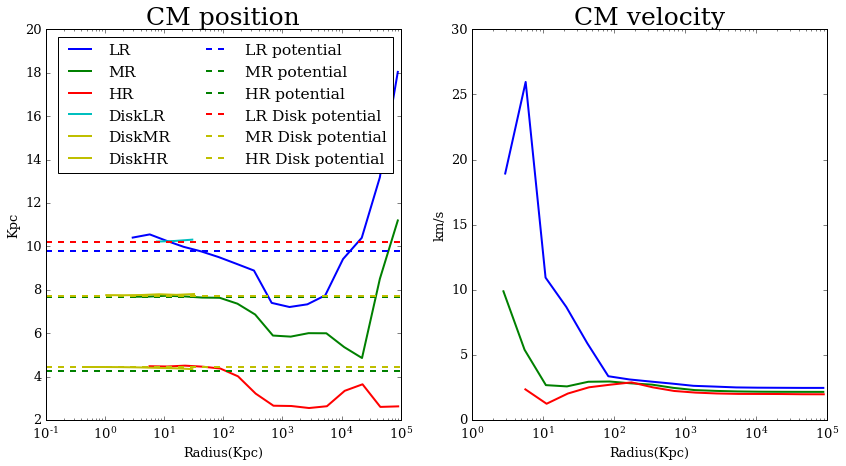

In [70]:
figure(figsize=(14, 7))
subplot(1, 2, 1)
title('CM position', fontsize=25)
plot(Rmwhalo1, Rcm_mwhalo1, lw=2, label='LR')
plot(Rmwhalo2, Rcm_mwhalo2, lw=2, label='MR')
plot(Rmwhalo3, Rcm_mwhalo3, lw=2, label='HR')
plot(RDisk1, Rcm_disk1, lw=2, label='DiskLR')
plot(RDisk2, Rcm_disk2, lw=2, label='DiskMR', c='y')
plot(RDisk3, Rcm_disk3, lw=2, label='DiskHR', c='y')

xscale('log')
axhline(RCMHmw1, lw=2, ls='--', label='LR potential')
axhline(RCMHmw2, lw=2, ls='--', c='g', label='MR potential')
axhline(RCMHmw3, lw=2, ls='--', c='g', label='HR potential')

axhline(RCMDpot1, lw=2, ls='--', c='r', label='LR Disk potential')
axhline(RCMDpot2, lw=2, ls='--', c='y', label='MR Disk potential')
axhline(RCMDpot3, lw=2, ls='--', c='y', label='HR Disk potential')

xlabel('Radius(Kpc)')
ylabel('Kpc')
legend(loc='best',ncol=2 )

subplot(1, 2, 2)
title('CM velocity', fontsize=25)
plot(Rmwhalo1, Vcm_mwhalo1, lw=2)
plot(Rmwhalo2, Vcm_mwhalo2, lw=2)
plot(Rmwhalo3, Vcm_mwhalo3, lw=2)
#plot(RDisk1, Vcm_disk1, lw=2, label='Disk')
#plot(RDisk2, Vcm_disk2, lw=2, label='Disk')
#plot(RDisk3, Vcm_disk3, lw=2, label='Disk')

#axhline(VCMHmw, lw=2, ls='--', label='HR potential')
#axhline(VCMHmwLR, lw=2, ls='--', c='g', label='LR potential')
xlabel('Radius(Kpc)')
ylabel('km/s')
xscale('log')

#axhline(RCMHmw, lw=2, alpha=0.6, c='k')
#axhline(RCMHmwLR, lw=2, alpha=0.6, c='k')
savefig('CM_comparison.png', bbox_inches='tight')

(128500, 130000)

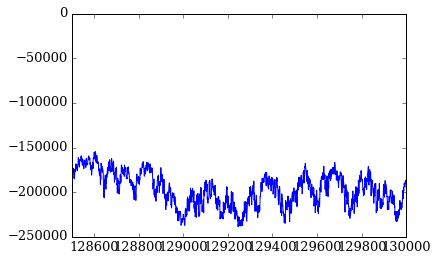

In [289]:
plot(potMWhalo)
xlim(128500, 130000)



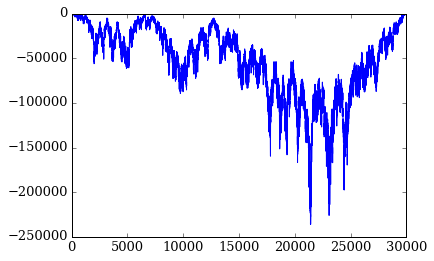

In [256]:
plot(potMWhaloLR)


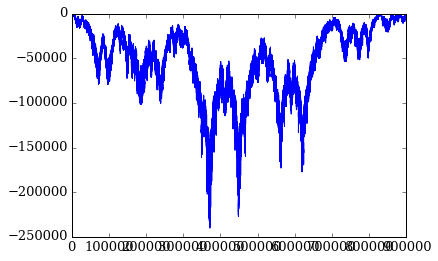

In [72]:
plot(potMWhalo3)


# Poisson Noise

$\dfrac{\sigma_x}{\sqrt{N}}$

following http://adsabs.harvard.edu/abs/2013ApJ...762..109B

In [154]:
def poissonN(x, y, z):
    #R = np.sqrt(x**2 + y**2 + z**2)
    pn = np.zeros(700)
    pn[0] = np.std(x)/ np.sqrt(len(x))
    Xmax = np.zeros(700)
    Xmax[0] = max(abs(x))
    i=0
    while len(x)>3:
        i+=1
        low_s = np.where(abs(x) <= 0.8*max(abs(x)))[0]
        #x = x[low_s]
        x = x[low_s]
        Xmax[i] = max(x)
        pn[i] = np.std(x) / (len(x)**(3.0/2.0)) # is this ok??
        
    index = np.where(pn!=0)[0]
    pn = pn[index]
    min_pn = np.where(pn == min(pn))
    return pn[index], Xmax[index]


In [155]:
PN1, Renclosed1 = poissonN(Xmwhalo1, Ymwhalo1, Zmwhalo1)
PN2, Renclosed2 = poissonN(Xmwhalo2, Ymwhalo2, Zmwhalo2)
PN3, Renclosed3 = poissonN(Xmwhalo3, Ymwhalo3, Zmwhalo3)

In [94]:
print type(Zmwhalo2)

<type 'numpy.ndarray'>


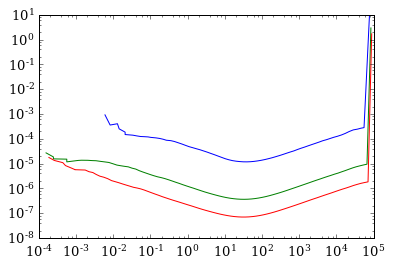

In [153]:
plot(Renclosed1, PN1)
plot(Renclosed2, PN2)
plot(Renclosed3, PN3)
xscale('log')
yscale('log')

In [135]:
print len(PN1)

70
